In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# import the requests module
import requests
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
# Import the time module.
import time

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Loop through all the cities in our list.
for i,city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
len(city_data)

Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | puerto carreno
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 1 | sangar
Processing Record 6 of Set 1 | faanui
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | fortuna
Processing Record 9 of Set 1 | ugep
Processing Record 10 of Set 1 | lagoa
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | pangnirtung
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | grindavik
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | kamiiso
Processing Record 22 of Set 1 | henties bay
Processing Record 23 of Set 1 | mataura
Processing Record 24 of Set 1 

Processing Record 42 of Set 4 | los llanos de aridane
Processing Record 43 of Set 4 | berlevag
Processing Record 44 of Set 4 | tessalit
Processing Record 45 of Set 4 | mecca
Processing Record 46 of Set 4 | urucui
Processing Record 47 of Set 4 | tual
Processing Record 48 of Set 4 | asau
Processing Record 49 of Set 4 | luanda
Processing Record 50 of Set 4 | lorengau
Processing Record 1 of Set 5 | kant
Processing Record 2 of Set 5 | tunduru
City not found. Skipping...
Processing Record 3 of Set 5 | pangody
Processing Record 4 of Set 5 | volkhovskiy
Processing Record 5 of Set 5 | ruatoria
City not found. Skipping...
Processing Record 6 of Set 5 | corinto
Processing Record 7 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 5 | margate
Processing Record 9 of Set 5 | constitucion
Processing Record 10 of Set 5 | ulaangom
Processing Record 11 of Set 5 | galegos
Processing Record 12 of Set 5 | kodinsk
Processing Record 13 of Set 5 | marzuq
Processing Record 14 of S

Processing Record 29 of Set 8 | cockburn town
Processing Record 30 of Set 8 | cortland
Processing Record 31 of Set 8 | kirakira
Processing Record 32 of Set 8 | kavieng
Processing Record 33 of Set 8 | kavaratti
Processing Record 34 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 35 of Set 8 | kapuskasing
Processing Record 36 of Set 8 | bolu
Processing Record 37 of Set 8 | vanavara
Processing Record 38 of Set 8 | champasak
Processing Record 39 of Set 8 | murgab
Processing Record 40 of Set 8 | quesnel
Processing Record 41 of Set 8 | meulaboh
Processing Record 42 of Set 8 | colares
Processing Record 43 of Set 8 | srednekolymsk
Processing Record 44 of Set 8 | port-gentil
Processing Record 45 of Set 8 | lompoc
Processing Record 46 of Set 8 | lagos
Processing Record 47 of Set 8 | gladstone
Processing Record 48 of Set 8 | saldanha
Processing Record 49 of Set 8 | baft
Processing Record 50 of Set 8 | makurdi
Processing Record 1 of Set 9 | poronaysk
Processing Record 2 of Set 9 

Processing Record 20 of Set 12 | esil
Processing Record 21 of Set 12 | aurich
Processing Record 22 of Set 12 | fort nelson
Processing Record 23 of Set 12 | borskoye
Processing Record 24 of Set 12 | saurimo
Processing Record 25 of Set 12 | ha tinh
Processing Record 26 of Set 12 | bredy
Processing Record 27 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 28 of Set 12 | niono
Processing Record 29 of Set 12 | belyy yar
Processing Record 30 of Set 12 | pirgos
Processing Record 31 of Set 12 | ust-nera
Processing Record 32 of Set 12 | monteagudo
Processing Record 33 of Set 12 | chushan
Processing Record 34 of Set 12 | riviere-au-renard
Processing Record 35 of Set 12 | cidreira
Processing Record 36 of Set 12 | matadi
Processing Record 37 of Set 12 | jinka
Processing Record 38 of Set 12 | zhezkazgan
Processing Record 39 of Set 12 | moba
Processing Record 40 of Set 12 | port hardy
Processing Record 41 of Set 12 | ashland
Processing Record 42 of Set 12 | herat
Processing Record 

561

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_columns_order = ['City','Cloudiness','Country','Date','Humidity', 'Lat', 'Lng', 'Max Temp','Wind Speed']
city_data_df = city_data_df [new_columns_order]
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saskylakh,98,RU,2020-02-16 18:45:21,94,71.92,114.08,2.39,10.89
1,Puerto Carreno,40,CO,2020-02-16 18:48:23,34,6.19,-67.49,96.80,11.41
2,Tiksi,100,RU,2020-02-16 18:48:23,92,71.69,128.87,-2.97,5.26
3,Sangar,100,RU,2020-02-16 18:48:23,94,63.92,127.47,-15.39,8.66
4,Faanui,99,PF,2020-02-16 18:48:23,75,-16.48,-151.75,82.22,16.42
5,Bredasdorp,43,ZA,2020-02-16 18:48:23,56,-34.53,20.04,73.40,20.80
6,Fortuna,90,US,2020-02-16 18:48:24,93,40.60,-124.16,52.00,5.82
7,Ugep,25,NG,2020-02-16 18:48:24,17,5.81,8.08,90.88,4.85
8,Lagoa,100,PT,2020-02-16 18:44:07,65,39.05,-27.98,55.02,19.98
9,Punta Arenas,20,CL,2020-02-16 18:48:24,50,-53.15,-70.92,53.60,25.28


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
#output_data_file = "weather_data/cities.csv"
#city_data_df=  pd.read_csv(output_data_file)
#city_data_df.head()

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

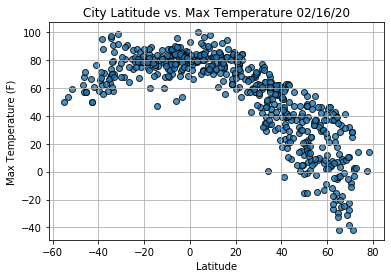

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

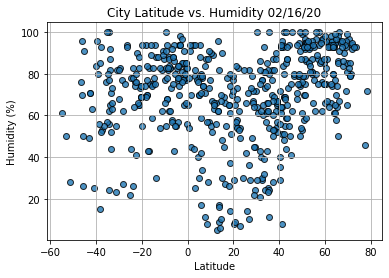

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

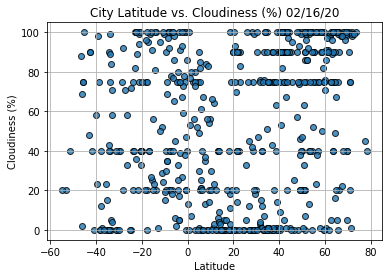

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

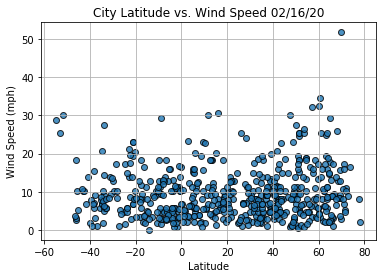

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()